In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import scipy
import math
from PIL import Image
from scipy import ndimage

#from lr_utils import load_dataset


In [180]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels
    print(train_set_x_orig.shape)
    
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    print("hi5"+"hola como estas")
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [181]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y, classes = load_dataset()

(209, 64, 64, 3)
hi5hola como estas


y = [1] , es =='cat'==imagen


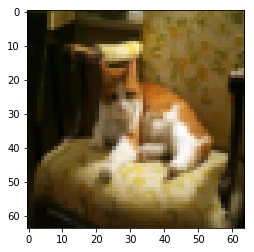

In [182]:
index = 7
plt.imshow(train_set_x_orig[index])
print("y = "+str(train_set_y_orig[:, index])+ " , es =='"+classes[np.squeeze(train_set_y_orig[:, index])].decode("utf-8")+ "'==imagen")

In [183]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print(m_train)
print(m_test)
print(num_px)


209
50
64


[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]
[[158 115 255 ...  41  18 133]
 [104 110 253 ...  47  18 163]
 [ 83 111 254 ...  84  16  75]
 ...
 [173 171 133 ... 183 144   5]
 [128 176 101 ... 141 137  22]
 [110 186 121 ... 116 108   5]]


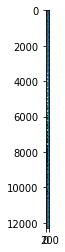

In [184]:
train_set_x_flatten  = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
print(train_set_x_flatten)
plt.imshow(train_set_x_flatten)

test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print(test_set_x_flatten)

In [185]:
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255
print(train_set_x)


[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]


In [186]:
def initialize_with_zeros(dim):
    w= np.zeros((dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return b,w

In [191]:
initialize_with_zeros(10)


(0, array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [188]:
def sigmoide(x):
     return 1 / (1 + math.e ** -x)

In [189]:
sigmoide(3.4)

0.9677045353015494

In [201]:
def propagate(w,b,X,Y):
    m=X.shape[1]
    A=sigmoide( np.dot(w.T,X)+b)
    print(A)
    cost = -1/m * np.sum(Y*np.log(A)+(1-Y)*(np.log(1-A)))
    
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw,  "db": db}
    return grads,cost


In [204]:
print("salida esperada")
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

salida esperada
[[0.99987661 0.99999386 0.00449627]]
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [194]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iterations):
        grads,cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w= w-dw*learning_rate
        b= b-db*learning_rate
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

In [206]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

[[0.99987661 0.99999386 0.00449627]]
[[0.99986717 0.99999318 0.00485901]]
[[0.99985702 0.99999243 0.00525079]]
[[0.9998461 0.9999916 0.0056739]]
[[0.99983434 0.99999068 0.00613079]]
[[0.99982169 0.99998966 0.00662412]]
[[0.99980807 0.99998852 0.00715672]]
[[0.99979342 0.99998726 0.00773166]]
[[0.99977765 0.99998587 0.00835222]]
[[0.99976068 0.99998432 0.00902193]]
[[0.99974243 0.9999826  0.00974457]]
[[0.99972278 0.99998069 0.01052419]]
[[0.99970165 0.99997857 0.01136515]]
[[0.99967892 0.99997623 0.01227208]]
[[0.99965446 0.99997362 0.01324997]]
[[0.99962815 0.99997074 0.01430414]]
[[0.99959985 0.99996754 0.01544026]]
[[0.99956941 0.99996399 0.0166644 ]]
[[0.99953668 0.99996006 0.017983  ]]
[[0.99950148 0.9999557  0.01940294]]
[[0.99946362 0.99995086 0.02093151]]
[[0.99942292 0.9999455  0.02257647]]
[[0.99937917 0.99993956 0.02434602]]
[[0.99933213 0.99993298 0.02624884]]
[[0.99928158 0.99992569 0.0282941 ]]
[[0.99922725 0.99991762 0.03049146]]
[[0.99916886 0.99990867 0.03285107]]
[[0.

In [196]:
def predict(w,b,X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    Y_DESTINO = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    #Obtener la predicción sin usar for
    Y_DESTINO = np.round(A)
    for i in range(A.shape[1]):
       
        if (A[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert(Y_prediction.shape == (1, m))
    print("Mi prediccion: ",Y_DESTINO)
    return Y_prediction

In [197]:
#Prueba de la predicción
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

Mi prediccion:  [[1. 1. 0.]]
predictions = [[1. 1. 0.]]
